In [1]:
import json

In [2]:
with open('test_score-2rW3GNyPlQx0.json', 'r') as file:
    data = json.load(file)

In [3]:
listener_dict = {}

for score in data['result']['scores']:
    listener_id = score['listener']['listener_id']
    systems = score['samples']['sample_a']['system']['abbreviation']
    scores = score['score_value']
    if listener_id not in listener_dict:
        listener_dict[listener_id] = []
        listener_dict[listener_id].append([systems, scores])
    else:
        listener_dict[listener_id].append([systems, scores])

# for listener_id, scores in listener_dict.items():
#     for score in scores:
#         if score[0][:2]=='S5' and score[1]==5:
#             print(listener_id)

In [4]:
dishonest_listeners = ['Xv04EbvdQMJE', 'rEG8ZbNV8ObN', 'Eam8z1A9Q7Mx', 'xND8x1jYKLRG', 'dXkQw1jWKr36', 
                       'ZxdQp1wY8Jlr', 'MA1KMdZO8jVp', '15dQnwyg8OxP', '3kG8Yo6x46LP', 'MNZ8DVL94B9Y', 
                       '9xV4WNVxKanW', 'dXkQw135Kr36']

In [5]:
new_listener_dict = {listener_id: scores for listener_id, scores in listener_dict.items() if listener_id not in dishonest_listeners}
len(new_listener_dict)

38

In [6]:
system_dict = {}
for listener_id, scores in new_listener_dict.items():
    for score in scores:
        if score[0] not in system_dict:
            system_dict[score[0]] = []
            system_dict[score[0]].append(score[1])
        else:
            system_dict[score[0]].append(score[1])

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [23]:
pesqs = {'S15G11': 2.304280676841736,
         'S25G1': 3.7990188598632812,
         'S15G3': 3.1559175157547,
         'S25G6': 3.270290899276733,
         'S15G6': 2.8429664278030398,
         'S45G1': 4.4097826957702635,
         'S15G8': 2.5103011417388914,
         'S5G13': 2.2606804513931276,
         'S5G16': 1.9089138746261596,
         'S25G3': 3.516825547218323,
         'S5G8': 2.8220131635665893,
         'S35G1': 4.187662181854248,
         'S5G11': 2.601540353298187,
         'S5G6': 3.0331207084655762,
         'ORI': 4.548638343811035}

In [11]:
sorted_systems = sorted(means.keys(), key=lambda system: means[system])
sorted_systems = [system.replace('S', 'SNR').replace('G', '\nGD') for system in sorted_systems]
print(sorted_systems)

['SNR5\nGD16', 'SNR5\nGD13', 'SNR5\nGD11', 'SNR5\nGD8', 'SNR5\nGD6', 'SNR15\nGD11', 'SNR15\nGD8', 'SNR15\nGD6', 'SNR15\nGD3', 'SNR25\nGD6', 'SNR25\nGD3', 'SNR25\nGD1', 'SNR35\nGD1', 'SNR45\nGD1', 'ORI']


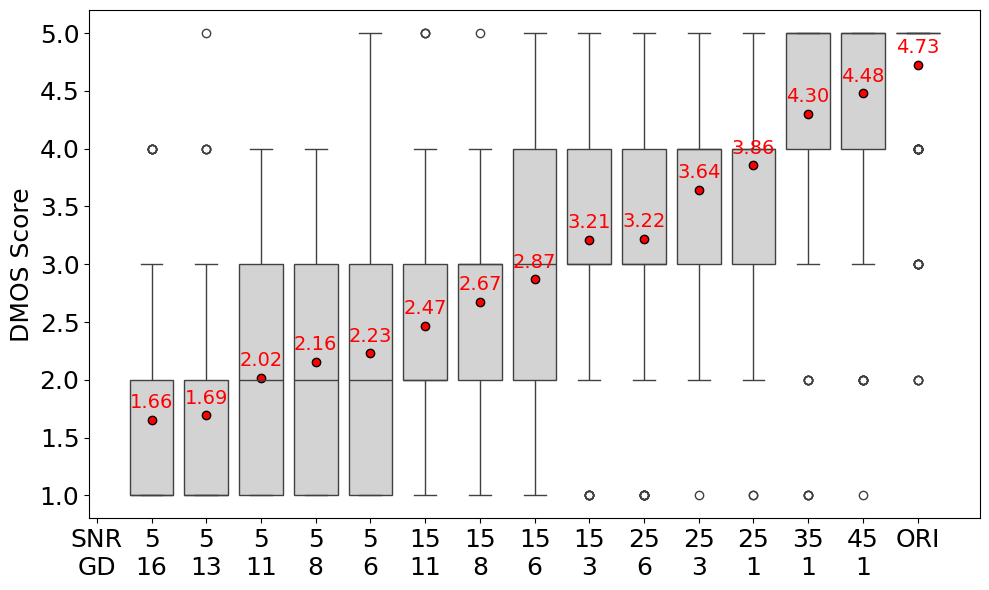

In [23]:
# 시스템 이름과 점수 리스트를 추출
systems = sorted(system_dict.keys())
data = [system_dict[system] for system in systems]
means = {system: np.mean(scores) for system, scores in system_dict.items()}

# 평균 점수에 따라 시스템과 점수를 정렬
sorted_systems = sorted(means.keys(), key=lambda system: means[system])
sorted_systems_rename = [system.replace('S', '').replace('G', '\n') for system in sorted_systems]
sorted_data = [system_dict[system] for system in sorted_systems]
sorted_means = [means[system] for system in sorted_systems]

# 박스플롯 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(data=sorted_data, color="lightgray")

# 개별 데이터 점수 (흰색 점) 표시
# for i in range(len(sorted_data)):
#     y = sorted_data[i]
#     x = np.random.normal(i, 0.04, size=len(y))  # 점을 분산시켜 보이도록 조정
#     plt.plot(x, y, 'wo', markeredgecolor='k', alpha=0.7)

# 평균 점수 (빨간 점) 표시
plt.plot(range(len(sorted_systems)), sorted_means, 'ro', markeredgecolor='k', label='DMOS')

# PESQ 점수 (파란 점) 표시
# pesq_scores = [pesqs[system] for system in sorted_systems]
# plt.plot(range(len(sorted_systems)), pesq_scores, 'bo', markeredgecolor='k', label='PESQ')

# 축 레이블 및 제목 설정
fontsize = 18

xticks = [-1] + list(range(len(sorted_systems)))
xticklabels = ['SNR\nGD'] + sorted_systems_rename


plt.xticks(xticks, xticklabels, rotation=0, fontsize=fontsize)
plt.yticks(np.arange(1.0, 5.1, 0.5), fontsize=fontsize)
plt.ylim(0.8, 5.2)
plt.ylabel("DMOS Score", fontsize=fontsize)
# plt.title("DMOS Scores by Noise-level")
# plt.legend()

# Show the value of each marker
for i in range(len(sorted_systems)):
    # if sorted_means[i] > pesq_scores[i]:
    #     plt.text(i, sorted_means[i] + 0.1, f'{sorted_means[i]:.2f}', color='red', ha='center')
    #     plt.text(i, pesq_scores[i] - 0.2, f'{pesq_scores[i]:.2f}', color='blue', ha='center')
    # else:
    #     plt.text(i, pesq_scores[i] + 0.1, f'{pesq_scores[i]:.2f}', color='blue', ha='center')
    #     plt.text(i, sorted_means[i] - 0.2, f'{sorted_means[i]:.2f}', color='red', ha='center')
    plt.text(i, sorted_means[i] + 0.1, f'{sorted_means[i]:.2f}', color='red', ha='center', fontsize=fontsize-4)

# 그래프 표시
plt.tight_layout()
plt.savefig('3-2.dmos.jpg')
plt.show()

In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np

points = [
    # {'SNR':5, 'GD':16.25, 'DMOS': 1.6560509554140128},
    # {'SNR':5, 'GD':13.75, 'DMOS': 1.6928104575163399},
    # {'SNR':5, 'GD':11.25, 'DMOS': 2.0194805194805197},
    # {'SNR':5, 'GD':8.75, 'DMOS': 2.1575342465753424},
    # {'SNR':5, 'GD':6.25, 'DMOS': 2.228187919463087},
    {'SNR':15, 'GD':11.25, 'DMOS': 2.4680851063829787},
    {'SNR':15, 'GD':8.75, 'DMOS': 2.675},
    {'SNR':15, 'GD':6.25, 'DMOS': 2.8701298701298703},
    {'SNR':15, 'GD':3.75, 'DMOS': 3.212328767123288},
    {'SNR':25, 'GD':6.25, 'DMOS': 3.2193548387096773},
    {'SNR':25, 'GD':3.75, 'DMOS': 3.643835616438356},
    {'SNR':25, 'GD':1.25, 'DMOS': 3.858064516129032},
    {'SNR':35, 'GD':1.25, 'DMOS': 4.3},
    {'SNR':45, 'GD':1.25, 'DMOS': 4.477707006369426},
]

# Extract SNR, GD, and DMOS values from points
X = np.array([[point['SNR'], point['GD']] for point in points])
y = np.array([point['DMOS'] for point in points])

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Extract the coefficients
a, b = model.coef_
c = model.intercept_

print(f'a: {a}, b: {b}, c: {c}')

a: 0.03463748532529595, b: -0.11056285653491067, c: 3.123841261082927


In [4]:
from sklearn.metrics import mean_squared_error

# Calculate the RMSE
y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f'RMSE: {rmse}')

RMSE: 0.06467611567088448


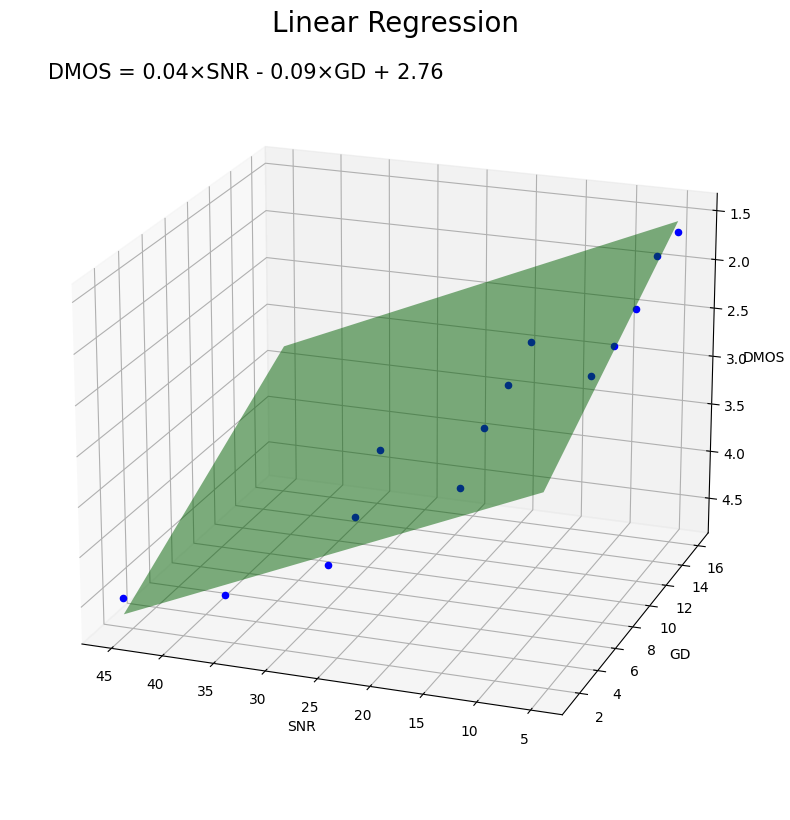

In [83]:
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure for the 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Generate a grid of SNR and GD values
snr_range = np.linspace(5, 45, 100)
gd_range = np.linspace(1.25, 16.25, 100)
SNR_grid, GD_grid = np.meshgrid(snr_range, gd_range)

# Calculate the Z values (DMOS) for the grid using the linear regression model
Z = a * SNR_grid + b * GD_grid + c

# Plot the plane
ax.plot_surface(SNR_grid, GD_grid, Z, alpha=0.5, rstride=100, cstride=100, color='g', edgecolor='none')

# Plot the points
for point in points:
    ax.scatter(point['SNR'], point['GD'], point['DMOS'], color='b')

# Set labels
ax.set_xlabel('SNR')
ax.set_ylabel('GD')
ax.set_zlabel('DMOS')
ax.set_title('Linear Regression', fontsize=20)
ax.text2D(0.05, 0.95, "DMOS = 0.04×SNR - 0.09×GD + 2.76", transform=ax.transAxes, fontsize=15)

# Rotate the figure for better view
ax.view_init(elev=200, azim=70)

# Show the plot
plt.show()

In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np

points = [
    # {'SNR':5, 'GD':16.25, 'LAQ': -6.91184352},
    # {'SNR':5, 'GD':13.75, 'LAQ': -6.71112808},
    # {'SNR':5, 'GD':11.25, 'LAQ': -6.68077202},
    # {'SNR':5, 'GD':8.75, 'LAQ': -6.71112808},
    # {'SNR':5, 'GD':6.25, 'LAQ': -6.63343194},
    {'SNR':15, 'GD':11.25, 'LAQ': -5.59475136},
    {'SNR':15, 'GD':8.75, 'LAQ': -5.02819748},
    {'SNR':15, 'GD':6.25, 'LAQ': -4.65515763},
    {'SNR':15, 'GD':3.75, 'LAQ': -3.91628867},
    {'SNR':25, 'GD':6.25, 'LAQ': -3.80302023},
    {'SNR':25, 'GD':3.75, 'LAQ': -2.96835936},
    {'SNR':25, 'GD':1.25, 'LAQ': -2.52913795},
    {'SNR':35, 'GD':1.25, 'LAQ': -1.83136738},
    {'SNR':45, 'GD':1.25, 'LAQ': -1.2554259},
]

# Extract SNR, GD, and DMOS values from points
X = np.array([[point['SNR'], point['GD']] for point in points])
y = np.array([point['LAQ'] for point in points])

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Extract the coefficients
a, b = model.coef_
c = model.intercept_

print(f'a: {a}, b: {b}, c: {c}')

# Calculate the predicted values
y_pred = model.predict(X)
# Calculate the prediction error
prediction_error = y - y_pred
for i in range(len(points)):
    print(f"Actual: {y[i]:.4f}, Predicted: {y_pred[i]:.4f}, Error: {prediction_error[i]:.4f}")
# Print the prediction error
print(f"Mean Absolute Prediction Error: {np.abs(prediction_error).mean():.4f}")

a: 0.07062682798904538, b: -0.23681254695461662, c: -4.045102783153364
Actual: -5.5948, Predicted: -5.6498, Error: 0.0551
Actual: -5.0282, Predicted: -5.0578, Error: 0.0296
Actual: -4.6552, Predicted: -4.4658, Error: -0.1894
Actual: -3.9163, Predicted: -3.8737, Error: -0.0425
Actual: -3.8030, Predicted: -3.7595, Error: -0.0435
Actual: -2.9684, Predicted: -3.1675, Error: 0.1991
Actual: -2.5291, Predicted: -2.5754, Error: 0.0463
Actual: -1.8314, Predicted: -1.8692, Error: 0.0378
Actual: -1.2554, Predicted: -1.1629, Error: -0.0925
Mean Absolute Prediction Error: 0.0818


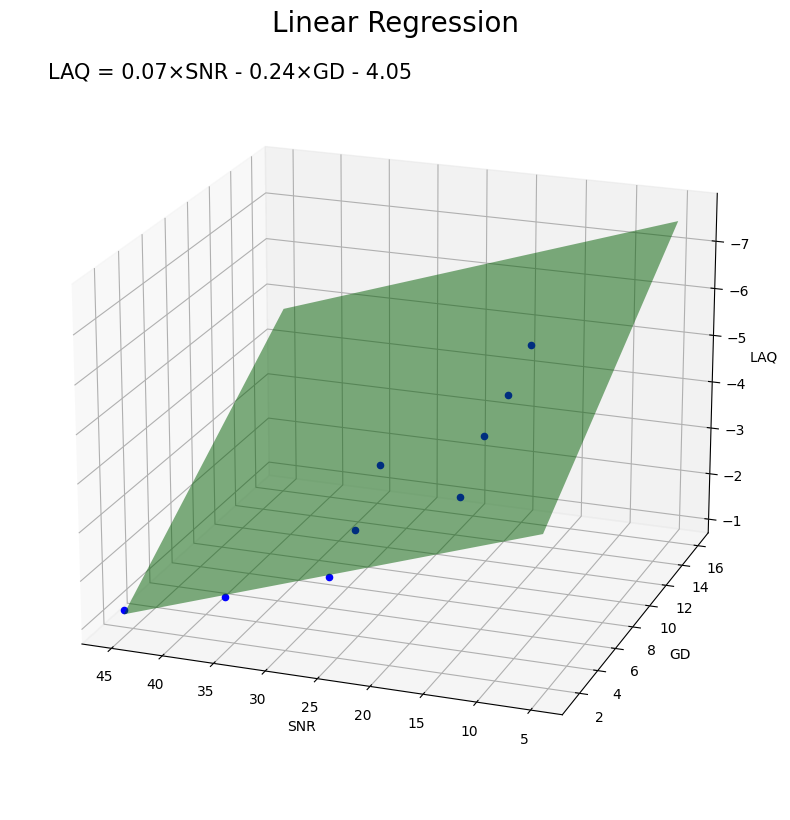

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure for the 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Generate a grid of SNR and GD values
snr_range = np.linspace(5, 45, 100)
gd_range = np.linspace(1.25, 16.25, 100)
SNR_grid, GD_grid = np.meshgrid(snr_range, gd_range)

# Calculate the Z values (LAQ) for the grid using the linear regression model
Z = a * SNR_grid + b * GD_grid + c

# Plot the plane
ax.plot_surface(SNR_grid, GD_grid, Z, alpha=0.5, rstride=100, cstride=100, color='g', edgecolor='none')

# Plot the points
for point in points:
    ax.scatter(point['SNR'], point['GD'], point['LAQ'], color='b')

# Set labels
ax.set_xlabel('SNR')
ax.set_ylabel('GD')
ax.set_zlabel('LAQ')
ax.set_title('Linear Regression', fontsize=20)
ax.text2D(0.05, 0.95, f"LAQ = {a:.2f}×SNR - {abs(b):.2f}×GD - {abs(c):.2f}", transform=ax.transAxes, fontsize=15)

# Rotate the figure for better view
ax.view_init(elev=200, azim=70)

# Show the plot
plt.show()

In [17]:
points = [
    # {'System': 'S5G16',  'DMOS': 1.6560509554140128, 'PESQ': 1.9089138746261596, 'LAQ': -6.91184352},
    # {'System': 'S5G13',  'DMOS': 1.6928104575163399, 'PESQ': 2.2606804513931276, 'LAQ': -6.71112808},
    # {'System': 'S5G11',  'DMOS': 2.0194805194805197, 'PESQ': 2.601540353298187,  'LAQ': -6.68077202},
    # {'System': 'S5G8',   'DMOS': 2.1575342465753424, 'PESQ': 2.8220131635665893, 'LAQ': -6.71112808},
    # {'System': 'S5G6',   'DMOS': 2.228187919463087,  'PESQ': 3.0331207084655762, 'LAQ': -6.63343194},
    {'System': 'S15G11', 'DMOS': 2.4680851063829787, 'PESQ': 2.304280676841736,  'LAQ': -5.59475136},
    {'System': 'S15G8',  'DMOS': 2.675,              'PESQ': 2.5103011417388914, 'LAQ': -5.02819748},
    {'System': 'S15G6',  'DMOS': 2.8701298701298703, 'PESQ': 2.8429664278030398, 'LAQ': -4.65515763},
    {'System': 'S15G3',  'DMOS': 3.212328767123288,  'PESQ': 3.1559175157547,    'LAQ': -3.91628867},
    {'System': 'S25G6',  'DMOS': 3.2193548387096773, 'PESQ': 3.270290899276733,  'LAQ': -3.80302023},
    {'System': 'S25G3',  'DMOS': 3.643835616438356,  'PESQ': 3.516825547218323,  'LAQ': -2.96835936},
    {'System': 'S25G1',  'DMOS': 3.858064516129032,  'PESQ': 3.7990188598632812, 'LAQ': -2.52913795},
    {'System': 'S35G1',  'DMOS': 4.3,                'PESQ': 4.187662181854248,  'LAQ': -1.83136738},
    {'System': 'S45G1',  'DMOS': 4.477707006369426,  'PESQ': 4.4097826957702635, 'LAQ': -1.2554259},
]

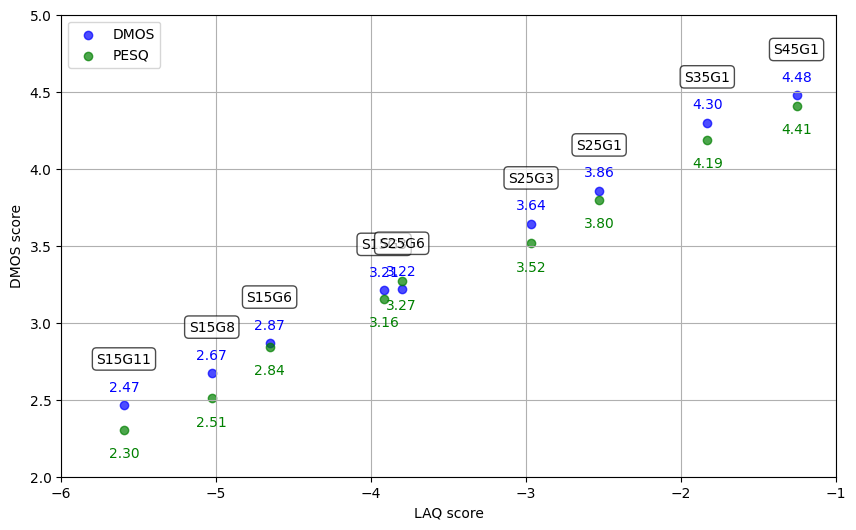

In [29]:
# Extract LAQ and DMOS values from points
laq_values = [point['LAQ'] for point in points]
dmos_values = [point['DMOS'] for point in points]
pesq_values = [point['PESQ'] for point in points]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(laq_values, dmos_values, color='blue', alpha=0.7)
plt.scatter(laq_values, pesq_values, color='green', alpha=0.7)
# plt.scatter(laq_values, np.array([2] * len(laq_values)), color='red', alpha=0.7)

# Annotate each point with the system value
for i, point in enumerate(points):
    plt.annotate(point['System'], (laq_values[i], dmos_values[i]), textcoords="offset points", xytext=(0,30), ha='center', 
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", alpha=0.7))
    plt.annotate(f'{dmos_values[i]:.2f}', (laq_values[i], dmos_values[i]), textcoords="offset points", xytext=(0,10), ha='center', color='blue')
    plt.annotate(f'{pesq_values[i]:.2f}', (laq_values[i], pesq_values[i]), textcoords="offset points", xytext=(0,-20), ha='center', color='green')
# Set x and y axis limits
plt.xlim(-6, -1)
plt.ylim(2, 5)

# Set labels and title
plt.xlabel('LAQ score')
plt.ylabel('DMOS score')
# plt.title('Scatter Plot of LAQ vs DMOS')
plt.legend(['DMOS', 'PESQ'], loc='upper left')
# Show the plot
plt.grid(True)
plt.show()

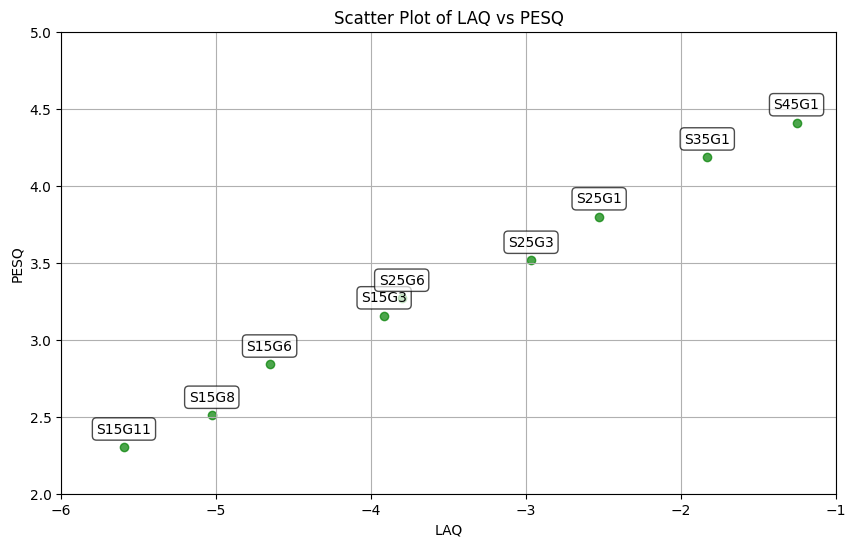

In [33]:
# Extract PESQ values from points
pesq_values = [point['PESQ'] for point in points]

# Create a scatter plot for DMOS vs PESQ
plt.figure(figsize=(10, 6))
plt.scatter(laq_values, pesq_values, color='green', alpha=0.7)

# Annotate each point with the system value
for i, point in enumerate(points):
    plt.annotate(point['System'], (laq_values[i], pesq_values[i]), textcoords="offset points", xytext=(0,10), ha='center', 
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", alpha=0.7))

# Set x and y axis limits
plt.xlim(-6, -1)
plt.ylim(2, 5)

# Set labels and title
plt.xlabel('LAQ')
plt.ylabel('PESQ')
plt.title('Scatter Plot of LAQ vs PESQ')

# Show the plot
plt.grid(True)
plt.show()